## Classification by :
* Bag of words
* TFIDF
* N-grams

In [2]:
# Loading necessary modules
import pandas as pd              # data processing; csv file i/o (pd.read_csv)
import numpy as np               # linear algebra
import matplotlib.pyplot as plt  # visulaization
%matplotlib inline

In [3]:
# Loading the dataset
data = pd.read_csv('C:/Users/Dell-pc/Desktop/Minor Project/Dataset/Twitter_Suicide_Data_new.csv')

In [7]:
data.head()

,Id,Content,Sentiment
0,49640624.0,The end.,Negative
1,43505275.0,GOD OVER EVERYTHING.,Negative
2,43505275.0,I'm sorry.,Negative
3,43505275.0,God... please forgive me.,Negative
4,43505275.0,This day couldn't get any worse...,Negative


In [5]:
len(data)

303

In [6]:
texts = []
labels = []
for i, label in enumerate(data['Sentiment']):
    texts.append(data['Content'][i])
    if label == 'Negative':
        labels.append(0)
    else:
        labels.append(1)

In [7]:
texts = np.asarray(texts)
labels = np.asarray(labels)

In [8]:
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 303
number of labels:  303


In [9]:
print(type(texts))

<class 'numpy.ndarray'>


In [10]:
print(texts[0])

The end.


In [11]:
print(np.unique(labels))
print(np.bincount(labels))

[0 1]
[175 128]


In [12]:
174/129    #More negative

1.3488372093023255

In [13]:
np.random.seed(42)
# shuffle data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
texts = texts[indices]
labels = labels[indices]

# we will use 80% of data as training, 20% as validation data
training_samples = int(303 * .8)
validation_samples = int(303 - training_samples)
# sanity check
print(len(texts) == (training_samples + validation_samples))
print("The number of training {0}, validation {1} ".format(training_samples, validation_samples))

texts_train = texts[:training_samples]
y_train = labels[:training_samples]
texts_test = texts[training_samples:]
y_test = labels[training_samples:]

True
The number of training 242, validation 61 


## Bag of words
#### Transform texts into bag of words matrix(number of columns == number of unique words, number of rows == total set 

In [14]:
# Example
toy_samples = ["It is sunny today and I like it, ", 
               "she does not like hamburger"]
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
# tokenize the document (split texts into each unique words)
vect.fit(toy_samples)
print("tokenization")
print(vect.vocabulary_, "\n")

# transform document into a matrix(the number indicates the number of words showing up in the document)
bag_of_words = vect.transform(toy_samples)
print("Transformed sparse matrix is: ")
print(bag_of_words.toarray())

tokenization
{'it': 4, 'is': 3, 'sunny': 8, 'today': 9, 'and': 0, 'like': 5, 'she': 7, 'does': 1, 'not': 6, 'hamburger': 2} 

Transformed sparse matrix is: 
[[1 0 0 1 2 1 0 0 1 1]
 [0 1 1 0 0 1 1 1 0 0]]


In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer().fit(texts_train)
X_train = vect.transform(texts_train)
print(repr(X_train))

<242x1006 sparse matrix of type '<class 'numpy.int64'>'
	with 2739 stored elements in Compressed Sparse Row format>


In [16]:
X_train.shape

(242, 1006)

In [17]:
X_test = vect.transform(texts_test)

In [18]:
np.bincount(y_train)

array([141, 101], dtype=int64)

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)

In [20]:
print(grid.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [21]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ", grid.score(X_test, y_test))

accuracy is:  0.885245901639


In [22]:
confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[34  0]
 [ 7 20]]


In [23]:
#Improve
#check vocab
features_names = vect.get_feature_names()
print(len(features_names))
print("\n")
# print first 20 features
print(features_names[:20])
print("\n")
# print last 20 features
print(features_names[-20:])
print("\n")
# print every 50th word
print(features_names[::400])

1006


['0spvugmr9o', '101', '18', '1qwj7jtq8n', '35', '67shakey', '7v50zgfrou', '88bottlesinaday', '8th', '93wdzdq0ke', '95', '___scoob', 'about', 'acceptance', 'according', 'accounts', 'achieve', 'action', 'active', 'actor']


['would', 'wouldn', 'wow', 'wrist', 'write', 'wrlhsvhll5', 'wud', 'yall', 'yeah', 'year', 'years', 'yo', 'yofanavirgianne', 'yoshi_onochin', 'you', 'your', 'yourbucketiist', 'yourself', 'youself', 'zampathelion']


['0spvugmr9o', 'hello', 'stage']


In [24]:
# We will use only the words that appear in at least 3 tweets -- In other words, we will use frequent words which are also likely to be in the test set
# min_df controls this condition(min_df=3 means pick up words which appear
# at least 3 documents)
vect = CountVectorizer(min_df=3).fit(texts_train)
X_train = vect.transform(texts_train)
X_test = vect.transform(texts_test)
print(repr(X_train))

<242x184 sparse matrix of type '<class 'numpy.int64'>'
	with 1777 stored elements in Compressed Sparse Row format>


In [25]:
features_names = vect.get_feature_names()
print(len(features_names))
print("\n")
# print first 20 features
print(features_names[:20])
print("\n")
# print last 20 features
print(features_names[-20:])
print("\n")
# print every 50th word
print(features_names[::400])

184


['about', 'after', 'again', 'ahead', 'all', 'alone', 'always', 'am', 'amp', 'an', 'and', 'another', 'anxiety', 'anyone', 'are', 'around', 'as', 'ask', 'at', 'be']


['we', 'well', 'were', 'what', 'when', 'who', 'why', 'will', 'wish', 'with', 'without', 'work', 'world', 'worth', 'would', 'wrist', 'years', 'you', 'your', 'yourself']


['about']


In [26]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)

In [27]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ", grid.score(X_test, y_test))

accuracy is:  0.885245901639


In [28]:
confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[32  2]
 [ 5 22]]


In [29]:
# remove stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words is :", len(ENGLISH_STOP_WORDS), "\n")
print("Examples: ", list(ENGLISH_STOP_WORDS)[::10])

Number of stop words is : 318 

Examples:  ['sixty', 'its', 'is', 'con', 'where', 'describe', 'before', 'mill', 'although', 'more', 'behind', 'across', 'should', 'these', 'hasnt', 'rather', 'below', 'above', 'thereafter', 'up', 'of', 'least', 'otherwise', 'been', 'mine', 'toward', 'throughout', 'had', 'onto', 'nowhere', 'thence', 're']


In [30]:
vect = CountVectorizer(min_df=3, stop_words='english').fit(texts_train)
X_train = vect.transform(texts_train)
X_test = vect.transform(texts_test)
print(repr(X_train))

<242x91 sparse matrix of type '<class 'numpy.int64'>'
	with 662 stored elements in Compressed Sparse Row format>


In [31]:
logreg = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(logreg, param_grid, cv=5)
logreg_train = grid.fit(X_train, y_train)

In [32]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(X_test)
print("accuracy is: ", grid.score(X_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

accuracy is:  0.918032786885
confusion matrix 
 [[33  1]
 [ 4 23]]


## TFIDF
#### Difference from bag of words -- tfidf gives hight weights to the words which appear less in many document. In other words, it recoginizes the words showing specific document as important words (since these are the s features of the specific documents )

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [34]:
logreg = LogisticRegression()
pipe = make_pipeline(TfidfVectorizer(min_df=3, norm=None, stop_words='english'), logreg)
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
logreg_train = grid.fit(texts_train, y_train)

In [35]:
logreg.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [36]:
print(grid.best_estimator_)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), norm=None, preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


In [37]:
# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(texts_test)
print("accuracy is: ", grid.score(texts_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

accuracy is:  0.901639344262
confusion matrix 
 [[32  2]
 [ 4 23]]


In [38]:
# Check which words are considered to be low tfidf(widely used words across many tweets) and high tfidf (used only in a few tweets)
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(texts_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

feature_names = np.array(vectorizer.get_feature_names())

print("features with lowest tfidf")
print(feature_names[sorted_by_tfidf[:20]], '\n')

print("featues with hightest tfidf")
print(feature_names[sorted_by_tfidf[-20:]])

features with lowest tfidf
['die' 'https' 'just' 'better' 'll' 'family' 'sorry' 'depressed' 'feeling'
 'good' 'enjoy' 'celebrating' 'http' 'end' 'joy' 'suicide' 'world' 'wish'
 'congratulations' 'people'] 

featues with hightest tfidf
['feel' 'god' 'going' 'hope' 'helping' 'life' 'love' 'want' 'kill' 'happy'
 'day' 'gone' 'don' 'great' 'important' 'friends' 'positive' 'indirect'
 'right' 'amp']


In [39]:
!pip install mglearn

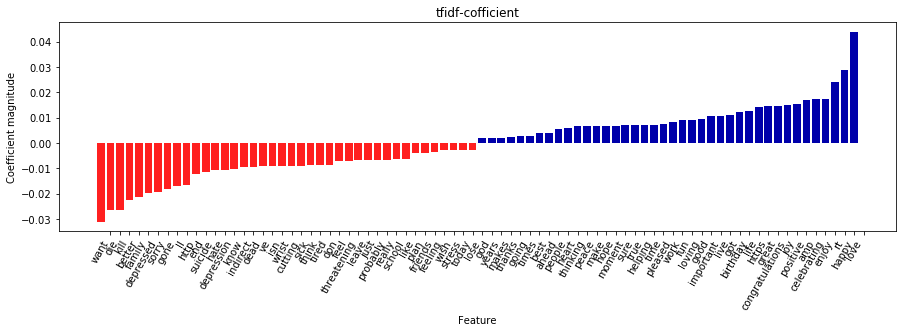

In [40]:
import mglearn 
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_, 
                                   feature_names, n_top_features=40)
plt.title("tfidf-cofficient")

## Ngrams
#### often single word is misleading predictor. For example, "like" and "don't like" are opposite

In [41]:
pipe = make_pipeline(TfidfVectorizer(min_df=3, stop_words='english'), logreg)
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'tfidfvectorizer__ngram_range': [(1,1), (1,2), (1,3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
logreg_train = grid.fit(texts_train, y_train)

# logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg_train.predict(texts_test)
print("accuracy is: ", grid.score(texts_test, y_test))
confusion = confusion_matrix(y_test, pred_logreg)
print("confusion matrix \n", confusion)

accuracy is:  0.934426229508
confusion matrix 
 [[34  0]
 [ 4 23]]


In [42]:
print(grid.best_estimator_)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_i...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])


C:\Users\sande\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


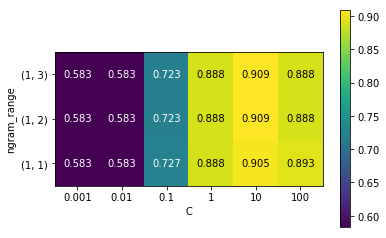

In [43]:
scores = [s.mean_validation_score for s in grid.grid_scores_]
scores = np.array(scores).reshape(-1, 3).T

heatmap = mglearn.tools.heatmap(scores, xlabel="C", ylabel="ngram_range", 
                                xticklabels=param_grid['logisticregression__C'], 
                                yticklabels=param_grid['tfidfvectorizer__ngram_range'], 
                                cmap='viridis', fmt="%.3f")
plt.colorbar(heatmap);

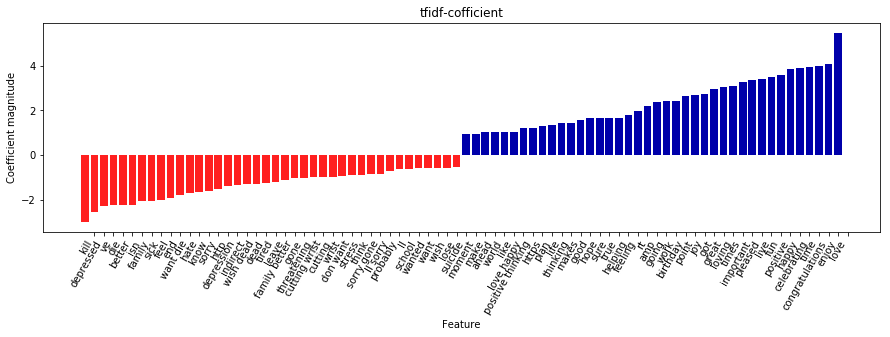

In [44]:
feature_names = np.array(grid.best_estimator_.named_steps['tfidfvectorizer'].get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef,feature_names, n_top_features=40)
plt.title("tfidf-cofficient")

#### Logistic Regression Accuracy %
#### bag of words : 88.5%
#### added tfidf feature : 90.16%
#### removed stopwords : 91.8%
#### added ngrams : 93.44%